<a href="https://colab.research.google.com/github/DHARANIDHARAN03K/-Implementation-of-Logistic-Regression-Using-Gradient-Descent/blob/main/NN_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset1 = pd.read_csv('/content/dataset.csv')
X = dataset1[['x']].values
y = dataset1[['y']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [16]:
# Name:
# Register Number:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,8)
    self.fc2 = nn.Linear(8, 10)
    self.fc3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()
    self.history = {'loss': []}
  def forward(self, x):

    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x) # No activation here since it's a regression task
    return x # Corrected indentation by replacing with a regular space

In [18]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [27]:
# Name:
# Register Number:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=3000):
    # Write your code here
    for epoch in range(epochs):
        optimizer.zero_grad() # Corrected indentation to align with loop
        loss = criterion (ai_brain (X_train), y_train) # Corrected indentation to align with loop
        loss.backward() # Corrected indentation to align with loop
        optimizer.step() # Corrected indentation to align with loop





        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')





        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [28]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/3000], Loss: 27.051157
Epoch [0/3000], Loss: 27.051157
Epoch [200/3000], Loss: 1.670937
Epoch [200/3000], Loss: 1.670937
Epoch [400/3000], Loss: 0.015555
Epoch [400/3000], Loss: 0.015555
Epoch [600/3000], Loss: 0.014023
Epoch [600/3000], Loss: 0.014023
Epoch [800/3000], Loss: 0.007300
Epoch [800/3000], Loss: 0.007300
Epoch [1000/3000], Loss: 0.010785
Epoch [1000/3000], Loss: 0.010785
Epoch [1200/3000], Loss: 0.013837
Epoch [1200/3000], Loss: 0.013837
Epoch [1400/3000], Loss: 0.010900
Epoch [1400/3000], Loss: 0.010900
Epoch [1600/3000], Loss: 0.011415
Epoch [1600/3000], Loss: 0.011415
Epoch [1800/3000], Loss: 0.011481
Epoch [1800/3000], Loss: 0.011481
Epoch [2000/3000], Loss: 0.011812
Epoch [2000/3000], Loss: 0.011812
Epoch [2200/3000], Loss: 0.011658
Epoch [2200/3000], Loss: 0.011658
Epoch [2400/3000], Loss: 0.011209
Epoch [2400/3000], Loss: 0.011209
Epoch [2600/3000], Loss: 0.011425
Epoch [2600/3000], Loss: 0.011425
Epoch [2800/3000], Loss: 0.011434
Epoch [2800/3000], Loss: 0

In [29]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.338067


In [30]:
loss_df = pd.DataFrame(ai_brain.history)

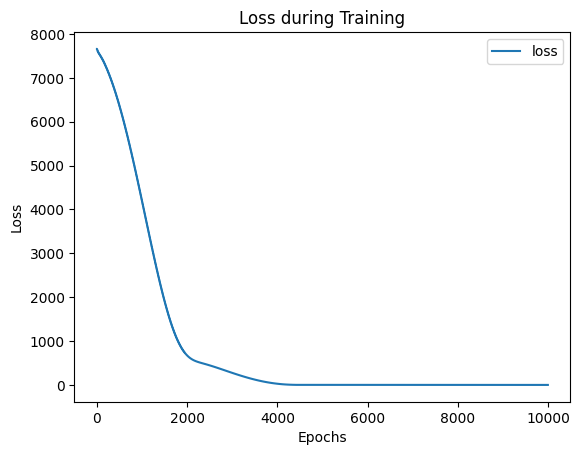

In [31]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [34]:
X_n1_1 = torch.tensor([[10]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 50.91630172729492
